In [302]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [199]:
colors = ['#24B4E6']

In [200]:
train = pd.read_csv('D:/Downloads/train.csv')
test = pd.read_csv('D:/Downloads/test.csv')

## Some analysis

In [218]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

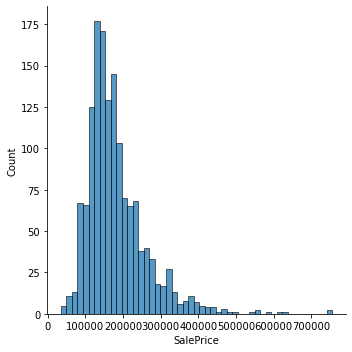

In [201]:
sns.displot(train.SalePrice)

In [210]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [211]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data preprocessing

In [215]:
trian = trian.apply(LabelEncoder().fit_transform)

In [216]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,5,327,6,4,104,53,128,361,0,...,2,6,3,4,1,2,4,2,4,4
1,1,0,498,5,7,77,26,0,482,0,...,1,6,2,4,1,2,4,2,4,4
2,2,5,702,6,4,102,52,104,222,0,...,2,6,2,4,1,2,4,2,4,4
3,3,6,489,6,4,19,20,0,66,0,...,2,6,3,1,0,2,4,2,4,1
4,4,5,925,7,4,101,50,221,328,0,...,2,6,2,4,1,2,4,2,4,4


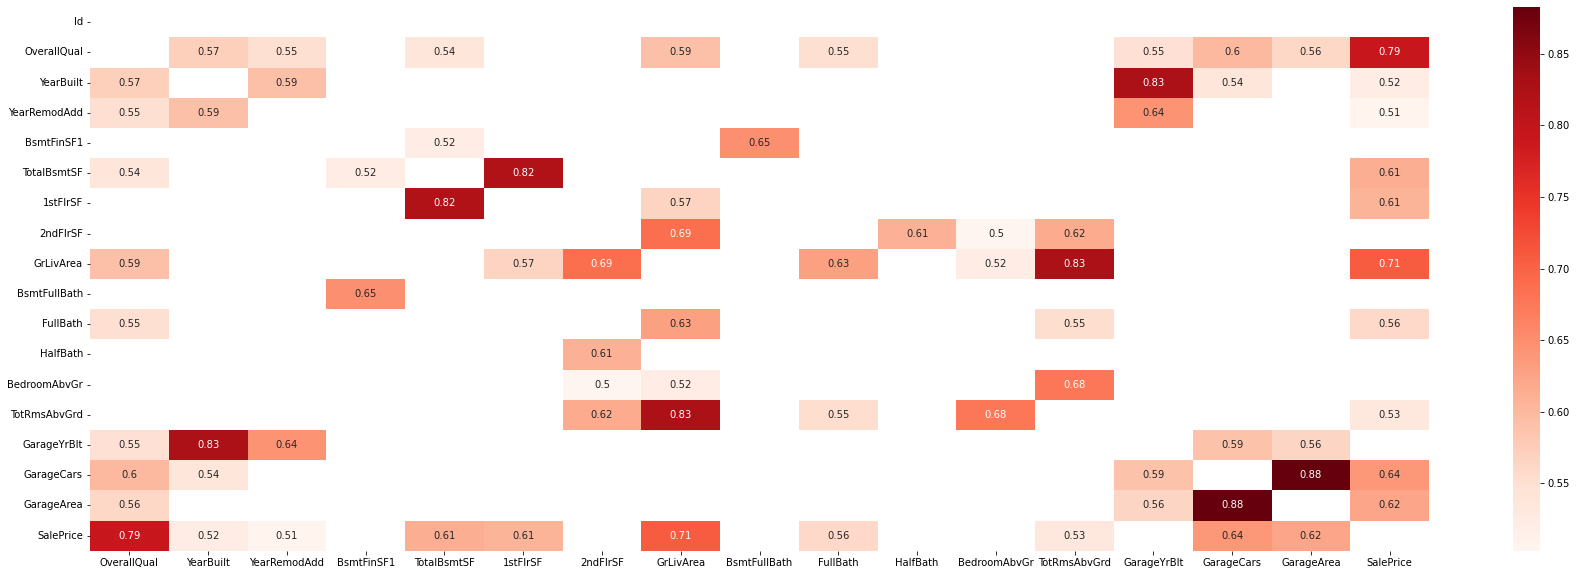

In [234]:
dfCorr = train.corr().abs()
filteredDf = dfCorr[(dfCorr >= .5)  & (dfCorr !=1.000)].drop_duplicates().dropna(axis=1, how='all')
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [246]:
features_names = list(filteredDf['SalePrice'].dropna().index)

In [256]:
X_train = train[features_names].copy()
y_train = train.SalePrice

In [261]:
X_train = StandardScaler().fit_transform(X_train)

## Models

### 1.1 Linear regressor

In [266]:
lin_reg = LinearRegression()

In [271]:
lin_reg_params = {'fit_intercept': [True, False]}

In [272]:
lin_reg_grid = GridSearchCV(lin_reg, lin_reg_params, cv = 5)

In [273]:
lin_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [276]:
lin_reg_grid.best_estimator_.score(X_train, y_train)

0.7736928402773303

### 1.2 Elastic Net

In [299]:
el_net = ElasticNetCV(cv=5, random_state=0)

In [300]:
el_net.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=0)

In [301]:
el_net.score(X_train, y_train)

0.10743518907496707

### 2. Random Forest

In [277]:
rf = RandomForestRegressor(random_state=0)

In [279]:
rf_params = {'n_estimators': range(50, 151, 10), 'max_depth': range(7, 15), \
             'min_samples_split': range(7, 15), 'min_impurity_decrease': [.01, .02, .03, .04, .05]}

In [288]:
rf_grid = GridSearchCV(rf, rf_params, cv = 5, verbose=1)

In [289]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_impurity_decrease': [0.05, 0.1, 0.2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [5, 10, 100]},
             verbose=1)

In [313]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=10, min_impurity_decrease=0.05,
                      min_samples_split=10, random_state=0)

In [291]:
rf_grid.best_estimator_.score(X_train, y_train)

0.9410830180242498

### 3. XGBoost

In [309]:
xgb_reg = XGBRegressor(n_estimators = 1000, seed = 0)

In [310]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [311]:
xgb_reg.score(X_train, y_train)

0.9998912654947413

# Prepare X_test

In [343]:
X_test = test[features_names].copy()

In [344]:
X_test = X_test.apply(LabelEncoder().fit_transform)

In [345]:
X_test = StandardScaler().fit_transform(X_test)

# Submit asnwer with XGBoost

In [347]:
xgb_prediction = xgb_reg.predict(X_test)

In [348]:
xgb_submission = pd.DataFrame({"Id": test.Id, "SalePrice": xgb_prediction})

In [349]:
xgb_submission.to_csv('xgb_submission1.csv', index=False)

# Submit with rf and xgb

In [350]:
rf_xgb_prediction = (xgb_prediction + rf_grid.best_estimator_.predict(X_test)) / 2

In [352]:
rf_xgb_submission = pd.DataFrame({"Id": test.Id, "SalePrice": rf_xgb_prediction})

In [353]:
rf_xgb_submission.to_csv('rf_xgb_submission1.csv', index=False)